#Computational drug discovery: part 5
##Comparing Regressors

In [2]:
# Import libraries
# Lazy Predict: fit and evaluate all the models from scikit-learn with a single line of code
! pip install lazypredict

     |████████████████████████████████| 248 kB 26.0 MB/s 
     |████████████████████████████████| 25.9 MB 940 bytes/s 
     |████████████████████████████████| 269 kB 51.1 MB/s 
     |████████████████████████████████| 1.2 MB 33.3 MB/s 
     |████████████████████████████████| 6.8 MB 62.9 MB/s 
     |████████████████████████████████| 127.6 MB 7.0 kB/s 
     |████████████████████████████████| 302 kB 58.8 MB/s 
     |████████████████████████████████| 10.1 MB 60.9 MB/s 
     |████████████████████████████████| 14.5 MB 7.4 kB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=58295754ac7ffdab00aa7dd560dec511c1544a82898fdd2580a6c12cb22fc5d3
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successful

In [1]:
! pip install pandas

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Load the data
! wget -O genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv https://raw.githubusercontent.com/AnVales/Drug-discovery/main/genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-09-07 18:09:47--  https://raw.githubusercontent.com/AnVales/Drug-discovery/main/genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 429392 (419K) [text/plain]
Saving to: ‘genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

genital_herpes_06_b 100%[===================>] 419.33K  --.-KB/s    in 0.006s  

2021-09-07 18:09:47 (70.5 MB/s) - ‘genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [429392/429392]



In [4]:
bioactivity_data = pd.read_csv('genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
# Let's have the two sets
X  = bioactivity_data.drop('pIC50', axis=1)
Y  = bioactivity_data.pIC50

In [6]:
# Pre-processing
X.shape

(235, 881)

In [7]:
Y.shape

(235,)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(235, 166)

In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,random_state =123)

In [ ]:
# Let's compare machine learning algorithms

# Defines and builds the lazyclassifier
# It is very similar to sklearn models
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [19]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,78510671395519161634542421804165387566197015417...,-3384080663599964119478138942282693653821838289...,8748708009232621055579565064192.00,0.27
LarsCV,121.42,-50.91,10.84,0.56
KernelRidge,36.30,-14.22,5.87,0.05
Lasso,3.32,0.00,1.50,0.03
LassoLarsIC,3.32,0.00,1.50,0.06
DummyRegressor,3.32,0.00,1.50,0.02
LassoLars,3.32,0.00,1.50,0.03
ElasticNet,2.59,0.31,1.25,0.03
OrthogonalMatchingPursuitCV,1.85,0.64,0.91,0.04


In [15]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,78510671395519161634542421804165387566197015417...,-3384080663599964119478138942282693653821838289...,8748708009232621055579565064192.00,0.27
LarsCV,121.42,-50.91,10.84,0.56
KernelRidge,36.30,-14.22,5.87,0.05
Lasso,3.32,0.00,1.50,0.03
LassoLarsIC,3.32,0.00,1.50,0.06
DummyRegressor,3.32,0.00,1.50,0.02
LassoLars,3.32,0.00,1.50,0.03
ElasticNet,2.59,0.31,1.25,0.03
OrthogonalMatchingPursuitCV,1.85,0.64,0.91,0.04


[(0.0, 1.0)]

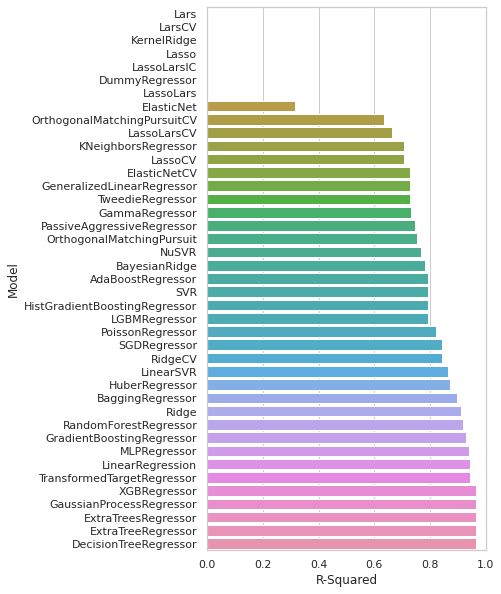

In [20]:
# Data visualization of model performance
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))